# God Class Detection

In [62]:
import numpy as np
import pandas as pd

In [63]:
from imblearn import combine, over_sampling, under_sampling
from imblearn import pipeline

In [64]:
from sklearn import ensemble
from sklearn import metrics 

In [65]:
def binary_classes(smell):
    return 0 if smell == "none" else 1

In [66]:
def fix_data_type(vector):
    return np.asarray(vector)

In [67]:
def load_data(dataset):
    df = pd.read_pickle(dataset)
    
    df["vectors"] = df["code_vector"].apply(lambda x: fix_data_type(x))
    df["classes"] = df["smell"].apply(lambda x: binary_classes(x))
    
    X = list(df["vectors"].values)
    y = list(df["classes"].values)
    
    return X, y

# ML_code2vec

In [68]:
import pickle
with open('../Data/God_Class_code2vec_train.pkl','rb') as f :
     test = pickle.load(f)
test       

,file_name,smell,top_10_contexts,code_vector
0,MLCQ_god_class/critical/7047868.txt,critical,"[0.53247446, 0.14661242, 0.09059859, 0.0850154...","[0.45385358, -0.5997693, 0.0071531124, 0.13972..."
1,MLCQ_god_class/critical/4296219.txt,critical,"[0.99999964, 3.2450896e-07, 3.427215e-08, 3.11...","[-0.3370849, -0.49457085, 0.97772235, -0.93292..."
2,MLCQ_god_class/critical/6773071.txt,critical,"[0.17713879, 0.13025844, 0.1068652, 0.09509429...","[0.28605577, 0.56653404, 0.24201764, 0.3583578..."
3,MLCQ_god_class/critical/6079026.txt,critical,"[0.4525667, 0.16972093, 0.10694614, 0.06857999...","[-0.918123, 0.04116136, -0.3900017, 0.31597513..."
4,MLCQ_god_class/critical/6204790.txt,critical,"[0.9132018, 0.03759842, 0.027390057, 0.0075106...","[-0.53880394, 0.06687407, -0.49011588, -0.6991..."
...,...,...,...,...
1572,MLCQ_god_class/none/3779095.txt,none,"[1.0, 2.6234446e-09, 9.438377e-10, 1.6077367e-...","[-0.4995799, 0.8406543, 0.36186394, 0.71766645..."
1573,MLCQ_god_class/none/9097418.txt,none,"[0.9939908, 0.0018803691, 0.0010978393, 0.0010...","[0.5664713, 0.4925053, 0.23594324, 0.29773736,..."
1574,MLCQ_god_class/none/4421462.txt,none,"[0.95747006, 0.008242132, 0.008000114, 0.00663...","[0.999337, 0.8439864, -0.4225111, 0.1255678, 0..."
1575,MLCQ_god_class/none/7784313.txt,none,"[0.21218984, 0.20952265, 0.16752462, 0.1320703...","[0.68605673, 0.38871866, -0.28576, 0.055675432..."


In [69]:
import pickle
with open('../Data/God_Class_code2vec_test.pkl','rb') as f :
     test = pickle.load(f)
test        

,file_name,smell,top_10_contexts,code_vector
0,MLCQ_god_class/critical/8528735.txt,critical,"[0.5006621, 0.19568214, 0.0958875, 0.04395538,...","[0.42502546, 0.122251175, 0.4220878, 0.9294927..."
1,MLCQ_god_class/critical/4131952.txt,critical,"[0.64630294, 0.23234731, 0.03572549, 0.0256367...","[-0.803502, 0.42783833, 0.18479188, -0.8583168..."
2,MLCQ_god_class/major/4401367.txt,major,"[0.679986, 0.28932577, 0.008929361, 0.00478065...","[0.54240274, 0.90637, -0.57367945, -0.6977233,..."
3,MLCQ_god_class/major/7747098.txt,major,"[0.23203237, 0.20352612, 0.18066701, 0.0904950...","[0.36575904, -0.0237494, 0.41491377, 0.7426690..."
4,MLCQ_god_class/major/5925637.txt,major,"[0.71174425, 0.17693718, 0.032431647, 0.027312...","[0.4906713, -0.58082134, 0.46860468, -0.098404..."
...,...,...,...,...
399,MLCQ_god_class/none/7652241.txt,none,"[0.9980894, 0.00033068334, 0.00028058173, 0.00...","[-0.9866688, 0.71938336, 0.16956356, -0.514234..."
400,MLCQ_god_class/none/8952223.txt,none,"[1.0, 3.8562565e-08, 3.891662e-09, 3.5062675e-...","[-0.86493427, 0.8429148, 0.9152062, -0.6281763..."
401,MLCQ_god_class/none/9249010.txt,none,"[0.99999905, 2.389804e-07, 1.8393118e-07, 1.72...","[0.31713802, 0.41181707, -0.38561812, 0.364298..."
402,MLCQ_god_class/none/9024840.txt,none,"[0.8633569, 0.05297965, 0.051839713, 0.0162480...","[0.49176028, 0.35984695, 0.05617713, -0.603158..."


In [70]:
X_train, y_train = load_data("../Data/God_Class_code2vec_train.pkl")

In [71]:
X_test, y_test = load_data("../Data/God_Class_code2vec_test.pkl")

In [72]:
model = pipeline.make_pipeline(
    combine.SMOTEENN(
        random_state=42,
        smote=over_sampling.SMOTE(sampling_strategy=0.81, random_state=42),
        enn=under_sampling.EditedNearestNeighbours(kind_sel="mode", sampling_strategy="majority"),
    ),
    ensemble.RandomForestClassifier(
        n_estimators=460, criterion="entropy", min_samples_split=8, min_samples_leaf=2, n_jobs=-1, bootstrap=1, random_state=42
    )
)

In [73]:
model.fit(X_train, y_train )

C:\Users\98910\anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_selection\_edited_nearest_neighbours.py:158: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  nnhood_label, _ = mode(nnhood_label, axis=1)


Pipeline(steps=[('smoteenn',
                 SMOTEENN(enn=EditedNearestNeighbours(kind_sel='mode',
                                                      sampling_strategy='majority'),
                          random_state=42,
                          smote=SMOTE(random_state=42,
                                      sampling_strategy=0.81))),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=1, criterion='entropy',
                                        min_samples_leaf=2, min_samples_split=8,
                                        n_estimators=460, n_jobs=-1,
                                        random_state=42))])

In [74]:
y_pred = model.predict(X_test)

In [75]:
print(metrics.classification_report(y_test, y_pred))
df= metrics.classification_report(y_test, y_pred,output_dict=True)
p=df['1']['precision']
r=df['1']['recall']
f1=df['1']['f1-score']
p_c2v=round(p,2)
r_c2v=round(r,2)
f1_c2v=round(f1,2)

              precision    recall  f1-score   support

           0       0.92      0.49      0.64       353
           1       0.16      0.69      0.26        51

    accuracy                           0.51       404
   macro avg       0.54      0.59      0.45       404
weighted avg       0.82      0.51      0.59       404



# ml_code2seq

In [76]:
from imblearn import over_sampling
from imblearn import pipeline

In [77]:
from sklearn import ensemble
from sklearn import svm
from sklearn import metrics 

In [78]:
def binary_classes(smell):
    return 0 if smell == "none" else 1

In [79]:
def fix_data_type(vector):
    return np.asarray(vector)

In [80]:
def load_data(dataset):
    df = pd.read_pickle(dataset)
    
    df["vectors"] = df["code_vector"].apply(lambda x: fix_data_type(x))
    df["classes"] = df["smell"].apply(lambda x: binary_classes(x))
    
    X = list(df["vectors"].values)
    y = list(df["classes"].values)
    
    return X, y

# God Class

In [81]:
import pickle
with open('../Data/God_Class_code2seq_train.pkl','rb') as f :
     test = pickle.load(f)
test        

,file_name,smell,code_vector
0,MLCQ_god_class/minor/7892253.txt,minor,"[0.12432454, -0.10166097, 0.13364129, 0.227159..."
1,MLCQ_god_class/minor/3702984.txt,minor,"[0.050833166, 0.102290735, 0.17509831, -0.1386..."
2,MLCQ_god_class/none/6328141.txt,none,"[0.013701867, -0.43376818, 0.23782189, 0.51114..."
3,MLCQ_god_class/none/7541111.txt,none,"[-0.17741776, -0.13296402, 0.050856803, 0.5015..."
4,MLCQ_god_class/none/8268165.txt,none,"[0.2769714, -0.008758382, 0.055619318, 0.67661..."
...,...,...,...
1584,MLCQ_god_class/none/6413248.txt,none,"[-0.39407435, -0.7428509, -0.14105143, 0.63867..."
1585,MLCQ_god_class/none/4289354.txt,none,"[0.090080075, -0.0011945665, 0.26744467, 0.352..."
1586,MLCQ_god_class/none/4348567.txt,none,"[0.10093282, -0.20933047, -0.05676936, -0.0023..."
1587,MLCQ_god_class/none/6281870.txt,none,"[0.07954935, -0.28694215, 0.018532818, 0.03484..."


In [82]:
import pickle
with open('../Data/God_Class_code2seq_test.pkl','rb') as f :
     test = pickle.load(f)
test        

,file_name,smell,code_vector
0,MLCQ_god_class/none/9189634.txt,none,"[0.07954935, -0.28694215, 0.018532818, 0.03484..."
1,MLCQ_god_class/none/4087381.txt,none,"[-0.017588854, -0.20889692, 0.07333965, 0.1367..."
2,MLCQ_god_class/none/5072938.txt,none,"[0.023526013, 0.29144958, -0.19444327, 0.31926..."
3,MLCQ_god_class/none/7798138.txt,none,"[0.10204331, -0.15995929, 0.03799103, 0.437305..."
4,MLCQ_god_class/none/8698235.txt,none,"[0.104760475, -0.42795932, -0.21982914, 0.1572..."
...,...,...,...
442,../data/MLCQ_god_class/none/8930850.txt,none,"[0.0014544651, 0.013595253, 0.049991384, 0.217..."
443,../data/MLCQ_god_class/none/8951219.txt,none,"[-0.19065198, -0.20903912, -0.41226232, 0.1307..."
444,../data/MLCQ_god_class/none/8955314.txt,none,"[-0.12239435, -0.1185602, 0.024051804, 0.38665..."
445,../data/MLCQ_god_class/none/8955824.txt,none,"[-0.048965737, 0.008853, 0.10797322, 0.1704907..."


In [83]:
X_train, y_train = load_data("../Data/God_Class_code2seq_train.pkl")

In [84]:
X_test, y_test = load_data("../Data/God_Class_code2seq_test.pkl")

In [85]:
model = pipeline.make_pipeline(
    over_sampling.SMOTE(sampling_strategy=0.76, random_state=42),
    ensemble.BaggingClassifier(
        base_estimator=svm.SVC(C=0.21, random_state=42),
        random_state=42
    )
)

In [86]:
model.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42, sampling_strategy=0.76)),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=SVC(C=0.21, random_state=42),
                                   random_state=42))])

In [87]:
y_pred = model.predict(X_test)

In [88]:
print(metrics.classification_report(y_test, y_pred))
df= metrics.classification_report(y_test, y_pred,output_dict=True)
p=df['1']['precision']
r=df['1']['recall']
f1=df['1']['f1-score']
p_c2s=round(p,2)
r_c2s=round(r,2)
f1_c2s=round(f1,2)

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       397
           1       0.34      0.50      0.41        50

    accuracy                           0.84       447
   macro avg       0.64      0.69      0.66       447
weighted avg       0.87      0.84      0.85       447



# Ml_cuBERT

# God class detection

Loading the dataset:

* df - pandas DataFrame containing the whole dataset
* df_train - pandas DataFrame containing the training set (approximately 80% of the dataset, selected by stratified sampling)
* d_test - pandas DataFrame containing the test set (approximately 20% of the dataset, selected by stratified sampling)

In [89]:
import pickle
with open('../Data/God_Class_CuBERT_embeddings.pkl','rb') as f :
     test = pickle.load(f)
test        

,embedding,name,label,sub_label,parts,sample_id,cbo,wmc,dit,rfc,...,modifiers,logStatementsQty,visibleMethodsQty,type,from_project,RM_LOC,RM_LCOM5,RM_NADC,RM_ATFD,RM_WMC
0,"[-126.83897924050689, -85.89345412701368, 171....",4131952,crit_blob,crit_blob,test,4131952,24,145.0,2,55,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[-88.04701530560851, -30.26268659159541, 41.46...",4296219,crit_blob,crit_blob,train,4296219,13,47.0,2,37,...,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[-79.97510790079832, 14.275625322014093, 14.30...",4455297,crit_blob,crit_blob,train,4455297,19,134.0,1,53,...,25,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[-146.59645302593708, 16.37998380511999, -57.1...",4512195,crit_blob,crit_blob,train,4512195,27,82.0,1,68,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[-219.9192757755518, -43.38192949350923, -5.85...",5596503,crit_blob,crit_blob,train,5596503,44,111.0,2,102,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,"[-8.470400530844927, 2.4278922472149134, -4.79...",8955314,not_blob,not_blob,test,8955314,5,NaN,2,14,...,10,0,2.0,2.0,True,38.0,0.0000,0.0,3.0,8.0
41,"[-8.909605611115694, 4.742891252040863, -6.986...",8955824,not_blob,not_blob,test,8955824,7,NaN,2,20,...,10,0,2.0,2.0,True,68.0,0.0000,0.0,7.0,14.0
42,"[0.619149774312973, -3.8339991867542267, 6.281...",9171873,not_blob,not_blob,test,9171873,0,NaN,1,0,...,1025,0,4.0,2.0,True,11.0,1.3333,0.0,2.0,4.0
43,"[-13.305480919778347, -0.06719226762652397, 2....",5738634,crit_blob,major,test,5738634,2,NaN,1,1,...,9,0,5.0,2.0,True,25.0,0.0000,0.0,4.0,7.0


In [90]:
import pandas as pd
import pickle
import numpy as np

pickleFile = open("../Data/God_Class_CuBERT_embeddings.pkl", 'rb')
df = pickle.load(pickleFile)
replace_vals = {"label":     {"crit_blob": 1, "not_blob": 0}}
df= df.replace(replace_vals)

df_train = df[df['parts']=='train']
y_train = df_train['label']
df_test = df[df['parts']=='test']
y_test = df_test['label']

X_train: using CuBERT embedding as features. Each row is represented as a 1024-dim vector. We created this vector by applying a pre-trained CuBERT Java model https://github.com/google-research/google-research/tree/master/cubert to code snippets.

In [91]:
X_train = np.array([row for row in df_train['embedding']])
y_train = np.array(df_train['label'])
X_test = np.array([row for row in df_test['embedding']])
y_test = np.array(df_test['label'])

Training the model on the train portion of the data

In [92]:
from sklearn import ensemble
from sklearn import svm

model = ensemble.BaggingClassifier(
    base_estimator=svm.SVC(
        C=0.010884125795534865,
        kernel="rbf",
        gamma="scale",
        random_state=42
    ),
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

from imblearn import combine, under_sampling, over_sampling
from sklearn import metrics

resampler = combine.SMOTEENN(
        random_state=42,
        smote=over_sampling.SMOTE(
            sampling_strategy="minority",random_state=42
        ),
        enn=under_sampling.EditedNearestNeighbours(
            sampling_strategy="majority",
            kind_sel="mode"
        )
    )

X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

model.fit(X_resampled,y_resampled)

C:\Users\98910\anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_selection\_edited_nearest_neighbours.py:158: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  nnhood_label, _ = mode(nnhood_label, axis=1)


BaggingClassifier(base_estimator=SVC(C=0.010884125795534865, random_state=42),
                  n_jobs=-1, random_state=42)

Applying the model on the test portion of the data

In [93]:
y_pred = model.predict(X_test)
print("Test report: \n", metrics.classification_report(y_test, y_pred))
df= metrics.classification_report(y_test, y_pred,output_dict=True)
p=df['1']['precision']
r=df['1']['recall']
f1=df['1']['f1-score']
p_cubert=round(p,2)
r_cubert=round(r,2)
f1_cubert=round(f1,2)

Test report: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       407
           1       0.48      0.58      0.53        53

    accuracy                           0.88       460
   macro avg       0.71      0.75      0.73       460
weighted avg       0.89      0.88      0.88       460



# Ml_metrics

In [94]:
import numpy as np
import pandas as pd

In [95]:
from imblearn import combine, over_sampling, under_sampling
from imblearn import pipeline

In [96]:
from sklearn import ensemble
from sklearn import metrics 

# God class

In [97]:
X_train_df = pd.read_excel("../Data/MLCQ_metrics_processed/train_X.xlsx")
X_train_df
X_train = X_train_df.values

In [98]:
y_train_df = pd.read_excel("../Data/MLCQ_metrics_processed/train_y.xlsx")
y_train_df
y_train = y_train_df["label"].values

In [99]:
X_test_df = pd.read_excel("../Data/MLCQ_metrics_processed/test_X.xlsx")
X_test_df
X_test = X_test_df.values

In [100]:
y_test_df = pd.read_excel("../Data/MLCQ_metrics_processed/test_y.xlsx")
y_test_df
y_test = y_test_df["label"].values

In [101]:
model = pipeline.make_pipeline(
    combine.SMOTEENN(
        random_state=42,
        smote=over_sampling.SMOTE(sampling_strategy=0.7, random_state=42),
        enn=under_sampling.EditedNearestNeighbours(kind_sel="mode", sampling_strategy="majority"),
    ),
    ensemble.RandomForestClassifier(
        n_estimators=100, criterion="entropy", min_samples_leaf=2, min_samples_split=5, n_jobs=-1, bootstrap=1, random_state=42
    )
)

In [102]:
model.fit(X_train, y_train)

C:\Users\98910\anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_selection\_edited_nearest_neighbours.py:158: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  nnhood_label, _ = mode(nnhood_label, axis=1)


Pipeline(steps=[('smoteenn',
                 SMOTEENN(enn=EditedNearestNeighbours(kind_sel='mode',
                                                      sampling_strategy='majority'),
                          random_state=42,
                          smote=SMOTE(random_state=42, sampling_strategy=0.7))),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=1, criterion='entropy',
                                        min_samples_leaf=2, min_samples_split=5,
                                        n_jobs=-1, random_state=42))])

In [103]:
y_pred = model.predict(X_test)

In [104]:
print(metrics.classification_report(y_test, y_pred))
df= metrics.classification_report(y_test, y_pred,output_dict=True)
p=df['True']['precision']
r=df['True']['recall']
f1=df['True']['f1-score']
p_ml_metric=round(p,2)
r_ml_metric=round(r,2)
f1_ml_metric=round(f1,2)

              precision    recall  f1-score   support

       False       0.95      0.88      0.91       407
        True       0.42      0.65      0.51        54

    accuracy                           0.85       461
   macro avg       0.69      0.77      0.71       461
weighted avg       0.89      0.85      0.87       461



# Ml_metrics_and_heuristics

In [105]:
import pandas as pd
import pickle
import numpy as np

In [106]:
import pickle
with open('../Data/God_Class_metrics_and_heuristics.pkl','rb') as f :
     test = pickle.load(f)
test   

,file,type,cbo,wmc,RM_WMC,dit,rfc,lcom,RM_LCOM5,tcc,...,([ATFD] > 2) & ([WMC] ≥ 47) & ([TCC] < 0.33),([WMC] ≥ 47) & ([TCC] < 0.3) & ([ATFD] > 5),"[LCOM] ≥ 0,725 & [WMC] ≥ 34 & [NOF] ≥ 8 & [NOM] ≥ 14",[CLOC] > 100|[VG] > 20,([NOM] > 20)|([NOF] > 9)|([CLOC] > 750),ALL,ANY,MAJOR VOTES,parts,label
0,5786929,class,54,144,138,4,135,229,0.9339,0.333333,...,0,0,1,1,1,0,1,1,train,1
1,5789396,class,10,6,6,2,2,6,1.1667,0.000000,...,0,0,0,0,0,0,0,0,train,0
2,5799314,class,11,16,16,1,9,1,0.6400,0.666667,...,0,0,0,0,0,0,0,0,train,0
3,5799022,class,7,8,8,1,6,0,0.8889,0.166667,...,0,0,0,0,0,0,0,0,train,0
4,5812130,class,3,1,1,2,0,0,0.0000,-1.000000,...,0,0,0,0,0,0,0,0,train,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,5975025,class,11,8,8,2,5,15,0.0000,0.000000,...,0,0,0,0,0,0,0,0,train,0
2296,7307669,class,1,2,2,1,0,0,0.0000,1.000000,...,0,0,0,0,0,0,0,0,train,0
2297,7322217,class,4,9,9,1,6,0,0.6667,0.523810,...,0,0,0,0,0,0,0,0,train,0
2298,7588520,class,1,5,5,1,0,0,0.5000,0.600000,...,0,0,0,0,0,0,0,0,test,0


In [107]:
pickleFile = open("../Data/God_Class_metrics_and_heuristics.pkl", 'rb')
df = pickle.load(pickleFile)

In [108]:
df_train = df[df['parts']=='train']
df_test = df[df['parts']=='test']

In [109]:
X_train = np.array(df_train.drop(['parts','label','file','type','ALL','ANY','MAJOR VOTES','([ATFD] > 2) & ([WMC] ≥ 47) & ([TCC] < 0.33)','([WMC] ≥ 47) & ([TCC] < 0.3) & ([ATFD] > 5)'],axis=1))
y_train = np.array(df_train['label'])
X_test = np.array(df_test.drop(['parts','label','file','type','ALL','ANY','MAJOR VOTES','([ATFD] > 2) & ([WMC] ≥ 47) & ([TCC] < 0.33)','([WMC] ≥ 47) & ([TCC] < 0.3) & ([ATFD] > 5)'],axis=1))
y_test = np.array(df_test['label'])

In [110]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
sc = std_scaler.fit(X_train)
X_train = sc.transform(X_train)
X_test= sc.transform(X_test)

In [111]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
                n_estimators=360,
                max_features="log2",
                min_samples_split=8,
                min_samples_leaf=4,
                bootstrap=False,
                criterion="entropy",
                random_state=42,
                n_jobs=-1
            )

In [112]:
from imblearn import combine, under_sampling, over_sampling
from sklearn import metrics

resampler = combine.SMOTEENN(
        random_state=42,
        smote=over_sampling.SMOTE(
            sampling_strategy=0.8,
            random_state=42),
        enn=under_sampling.EditedNearestNeighbours(
            sampling_strategy="majority",
            kind_sel="mode"
        )
    )

X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

model.fit(X_resampled,y_resampled)

y_pred = model.predict(X_test)

print("Test report: \n", metrics.classification_report(y_test, y_pred))
df= metrics.classification_report(y_test, y_pred,output_dict=True)
p=df['1']['precision']
r=df['1']['recall']
f1=df['1']['f1-score']
p_ml_M_H=round(p,2)
r_ml_M_H=round(r,2)
f1_ml_M_H=round(f1,2)

C:\Users\98910\anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_selection\_edited_nearest_neighbours.py:158: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  nnhood_label, _ = mode(nnhood_label, axis=1)


Test report: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       407
           1       0.43      0.69      0.52        54

    accuracy                           0.85       461
   macro avg       0.69      0.78      0.72       461
weighted avg       0.89      0.85      0.87       461



# H_metrics

In [113]:
df = pd.read_csv('../Outputs/Tables/God_Class_Table_5.csv')
df
p_H_metrics =df.loc[7].at["Test set-P"]
r_H_metrics =df.loc[7].at["Test set-R"]
f1_H_metrics=df.loc[7].at["Test set-F"]

In [119]:
Table9 = pd.DataFrame(columns=['Denotement','Features','Approach', 'Precision','Recall','F-measure'])
data = {'Denotement':['ML_code2vec','ML_code2seq','H_metrics','ML_metrics','ML_metrics&votes','ML_CuBERT'], 
        'Features':['code2vec features','code2seq features','Code metrics','Code metrics','Code metrics + votes of heuristic detectors (GC3 – GC8)','CuBERT features'],
        'Approach':['Random Forest + SMOTEENN','Random Forest + SMOTEENN','Heuristic detector (GC8)','Random Forest + SMOTEENN','Random Forest + SMOTEENN','Bagging (SVM classifier) + SMOTEENN'],
        'Precision':[p_c2v,p_c2s,p_H_metrics,p_ml_metric,p_ml_M_H,p_cubert],
        'Recall':[r_c2v,r_c2s,r_H_metrics,r_ml_metric,r_ml_M_H,r_cubert],
        'F-measure':[f1_c2v,f1_c2s,f1_H_metrics,f1_ml_metric,f1_ml_M_H,f1_cubert]}
Table9 =pd.DataFrame(data)
Table9.to_csv('../Outputs/Tables/God_Class_Table9.csv')
Table9

,Denotement,Features,Approach,Precision,Recall,F-measure
0,ML_code2vec,code2vec features,Random Forest + SMOTEENN,0.16,0.69,0.26
1,ML_code2seq,code2seq features,Random Forest + SMOTEENN,0.34,0.50,0.41
2,H_metrics,Code metrics,Heuristic detector (GC8),0.37,0.70,0.49
3,ML_metrics,Code metrics,Random Forest + SMOTEENN,0.42,0.65,0.51
4,ML_metrics&votes,Code metrics + votes of heuristic detectors (G...,Random Forest + SMOTEENN,0.43,0.69,0.52
5,ML_CuBERT,CuBERT features,Bagging (SVM classifier) + SMOTEENN,0.48,0.58,0.53


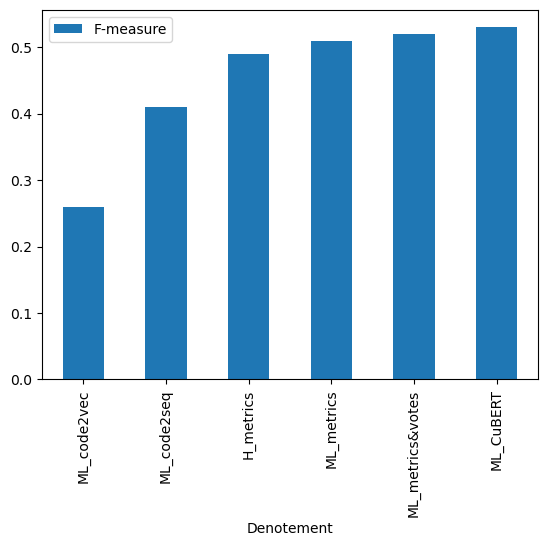

In [118]:
plot=Table9.plot(x='Denotement',y='F-measure', kind='bar')
plot
fig=plot.get_figure()
fig.savefig("../Outputs/Figures/God_Class_Fig_6.png" , dpi=fig.dpi)